<a href="https://colab.research.google.com/github/ShubhamDeshmukh27/Email-Campaign-Prediction-/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem Statement**

Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. 
The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader. 
Data columns are self-explanatory.


##**Importing**

In [268]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [269]:
# Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Import package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import folium
sns.set(color_codes = True)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.patches as mpatches

##**Data Inspection**

In [270]:
#Reading csv file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Email Campaigned Project /data_email_campaign.csv')

In [271]:
#Number of rows and columns
df.shape

(68353, 12)

In [272]:
#Print top  rows 
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [273]:
#Description of dataset 
df.describe(include='all')

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353,68353.000000,68353.000000,68353.000000,56758,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
unique,68353,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EMA00085149862470,NaN,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,23173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.285094,1.095481,1.456513,NaN,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,NaN,0.451462,0.997578,0.498109,NaN,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,NaN,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,NaN,1.000000,0.200000,1.000000,NaN,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,NaN,1.000000,0.800000,1.000000,NaN,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,NaN,2.000000,1.800000,2.000000,NaN,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000


In [274]:
#Type of features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


##**Basic Exploratary Data Analysis**

In [275]:
#Rename the columns
df = df.rename(columns={'Email_ID':'id','Email_Type':'email_type','Subject_Hotness_Score':'score','Email_Source_Type':'source_type','Customer_Location':'location','Email_Campaign_Type':'campaign_type','Total_Past_Communications':'past_communication','Time_Email_sent_Category':'category','Word_Count':'word_count','Total_Links':'total_links','Total_Images':'images','Email_Status':'status'})

In [276]:
#Data
df.head()

,id,email_type,score,source_type,location,campaign_type,past_communication,category,word_count,total_links,images,status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


##**Handelling Numerical Features**

In [277]:
#Extracting the numerical features
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['email_type', 'score', 'source_type', 'campaign_type',
       'past_communication', 'category', 'word_count', 'total_links', 'images',
       'status'],
      dtype='object')

###Univariate analysis

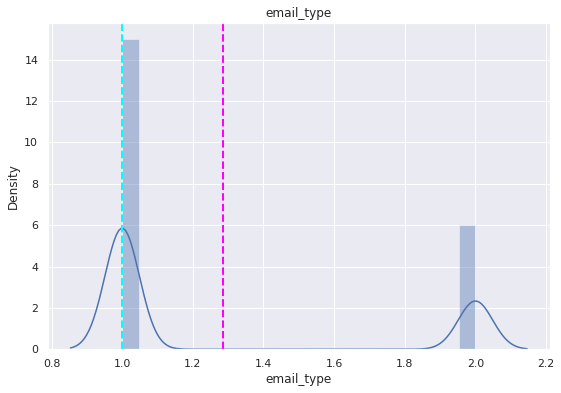

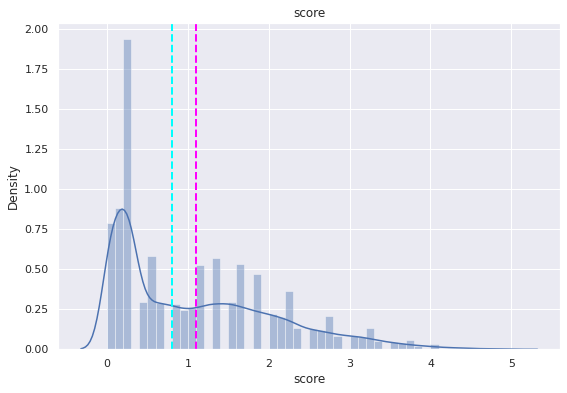

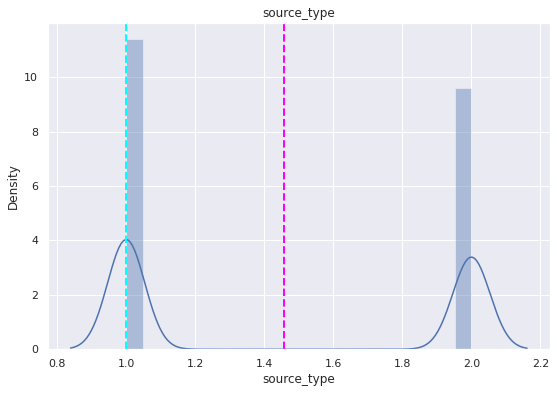

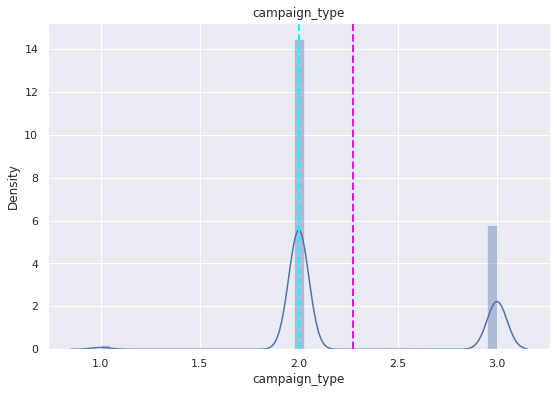

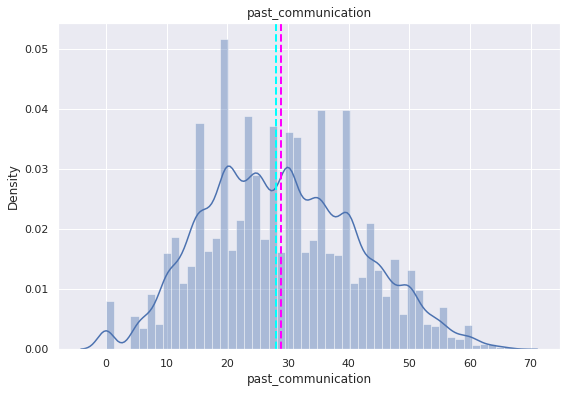

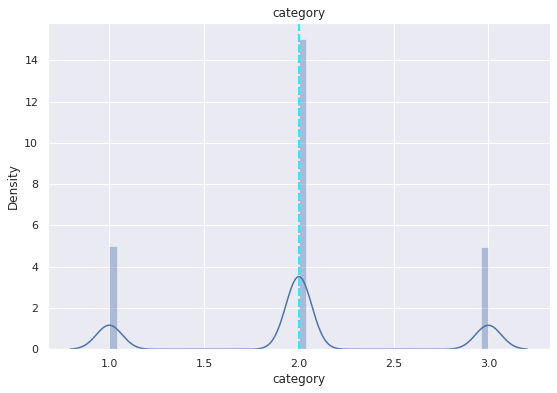

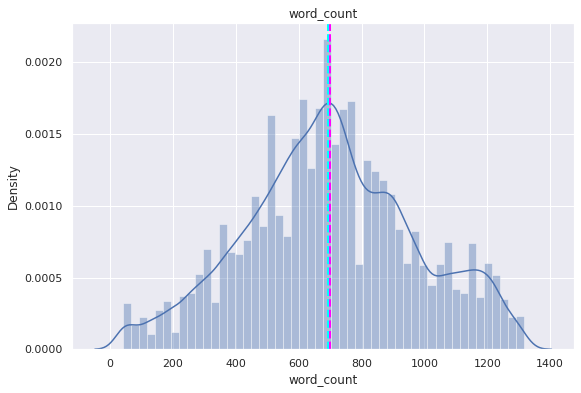

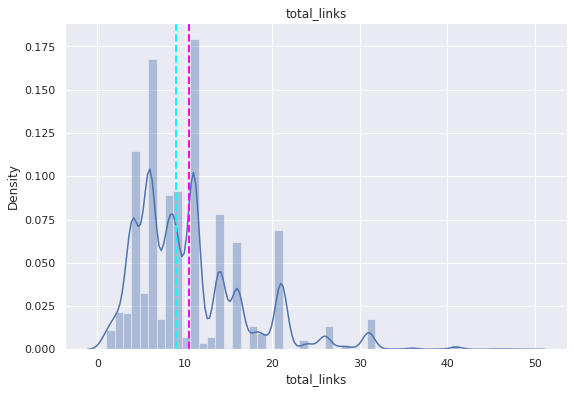

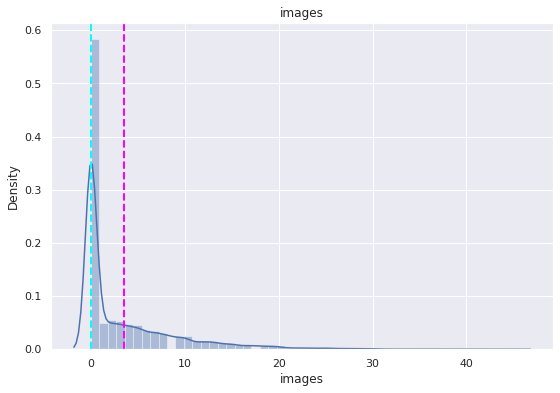

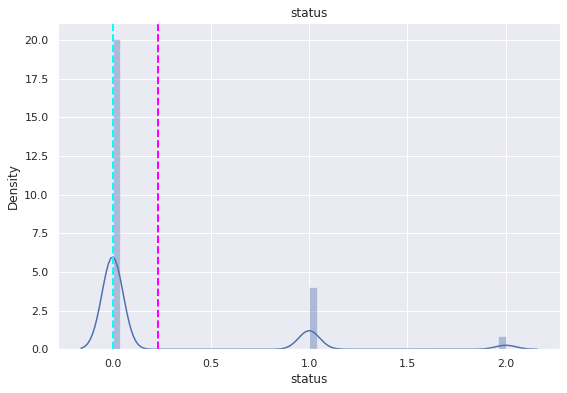

In [278]:
#plot a bar plot for each numerical feature count with Dist Plot
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

###The conclusion from above histograms


1.   The features for distribution is symmetric - 
         A)Word Count
         B)Past Communication


2.   The features for distribution is skewed -
         A)Images
         B)Total_links
         C)Score



###Bivariate Analysis

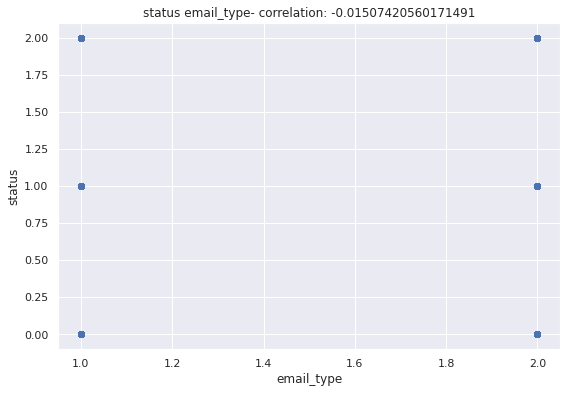

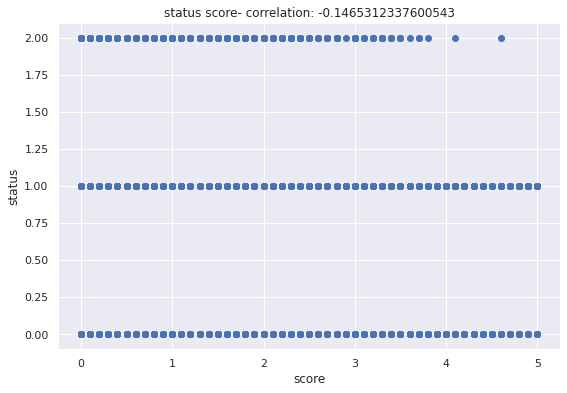

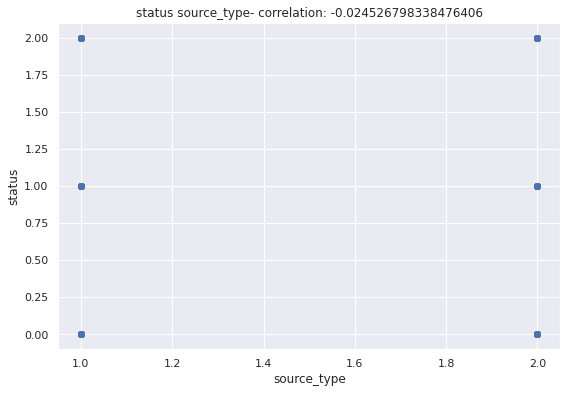

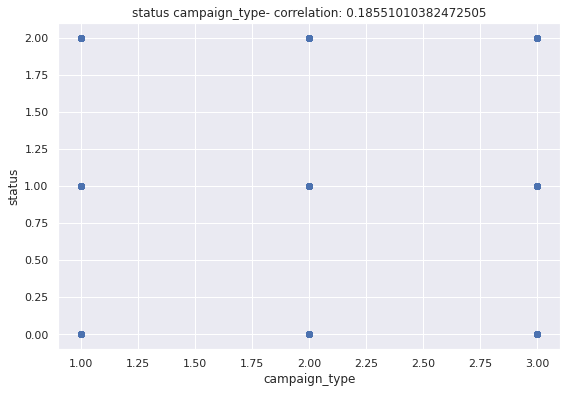

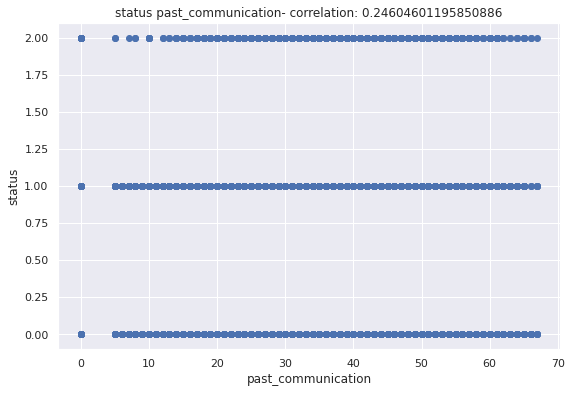

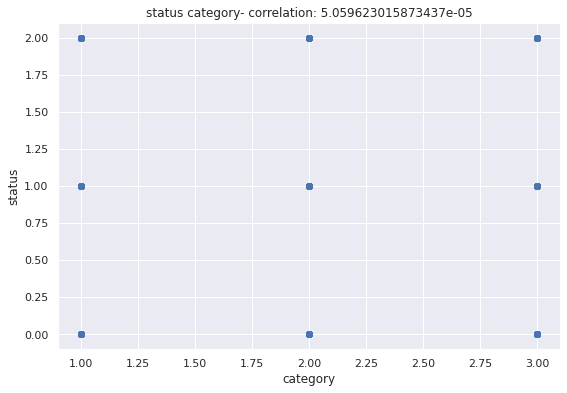

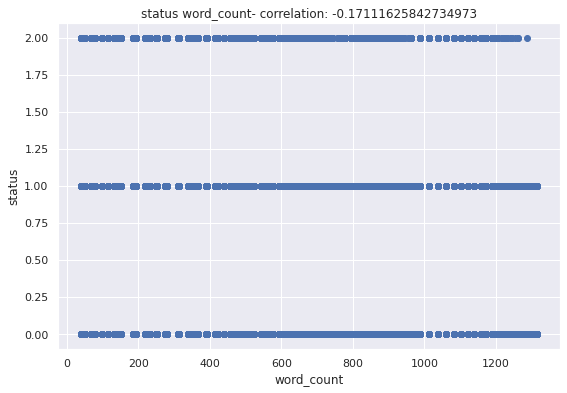

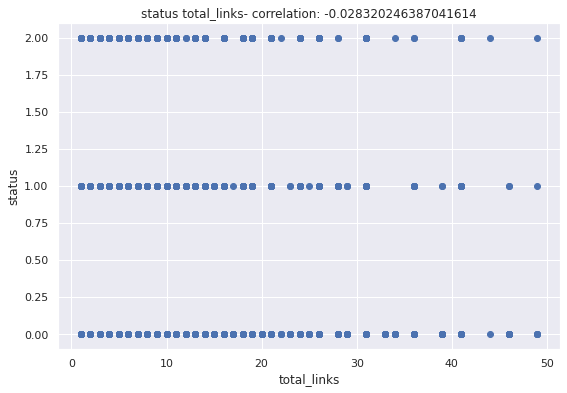

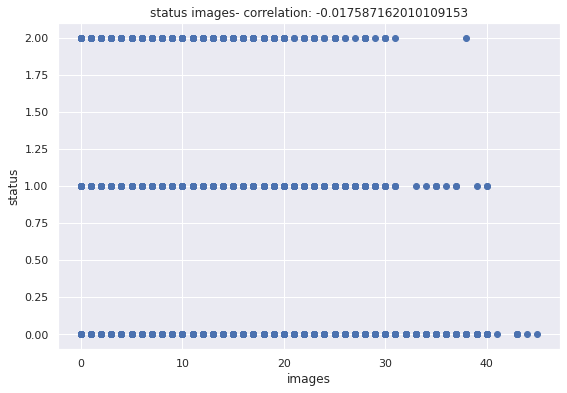

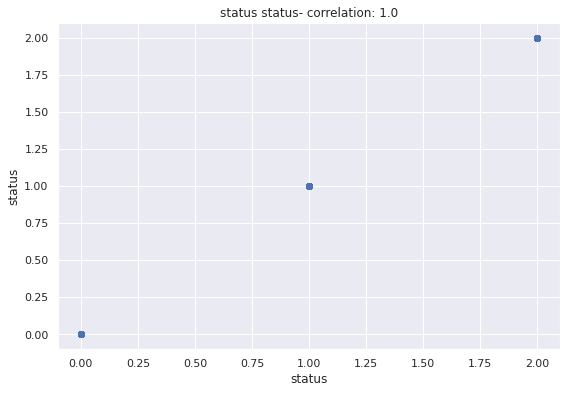

In [279]:
#plot a bar plot for each numerical feature count with scatter Plot
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=df[col]
  label=df['status']
  correlation= feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('status')
  ax.set_title('status ' +col +'- correlation: '+ str(correlation))

####Conclusion from bivariate analysis
* 1)status feature is positively correlated with features past communication and category.
* 2)status feature is negatively correlated with features word count and score.

##**Handelling Categorical Features**

In [280]:
#Extracting the categorical features 
categorical_columns=list(df.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index(['id', 'location'], dtype='object')

###Univariate Analysis 

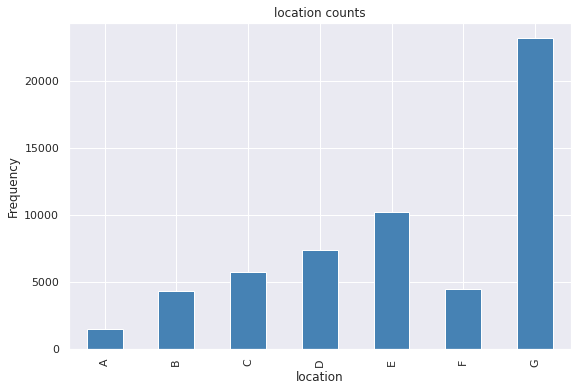

In [281]:
#plot a bar plot for each categorical feature count with Dist Plot
for col in categorical_features[1:]:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

###We can conclude from above histogram that location G is  highest in numbers.

###Bivariate Analysis

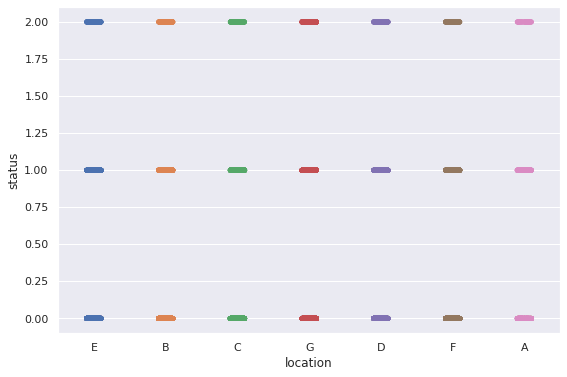

In [282]:
#plot a bar plot for each categorical feature count with Dist Plot
for col in categorical_features[1:]:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(x=df[col],y=df.status)

###Relationship between the dependent variable and independent variable

In [283]:
#creating list of features 
b = list(df.columns.tolist())

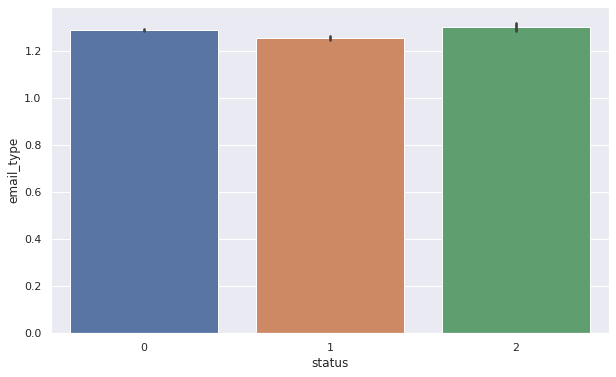

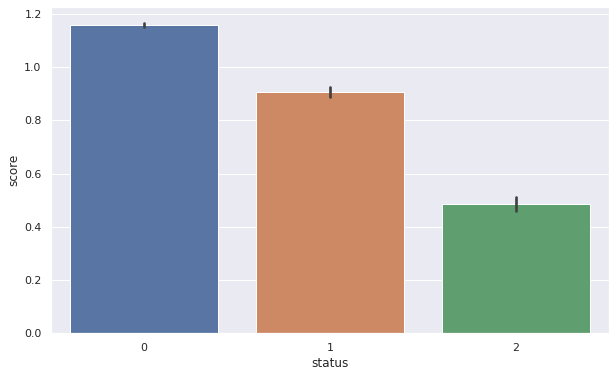

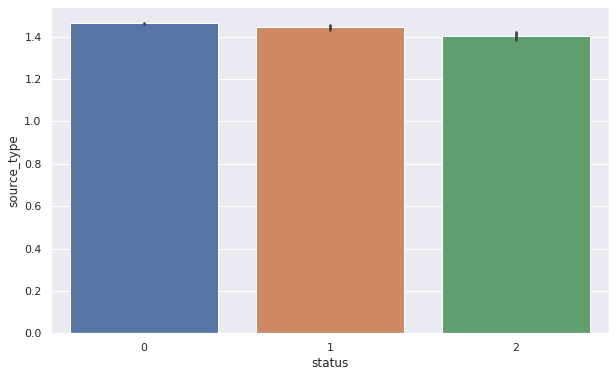

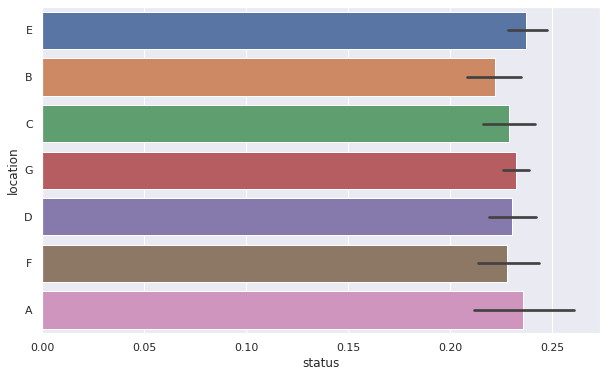

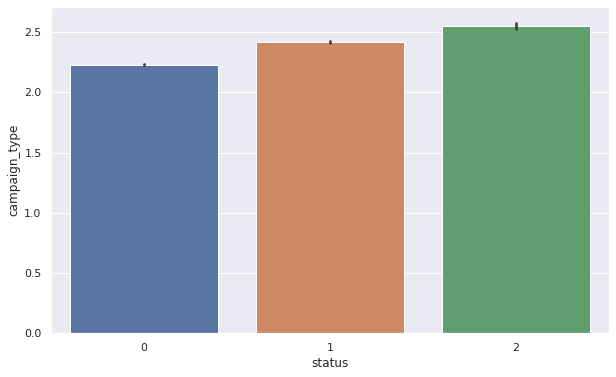

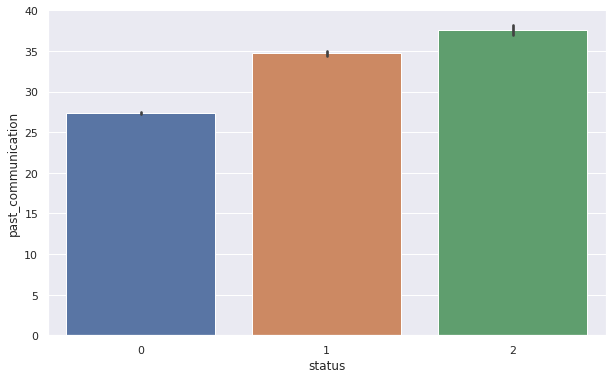

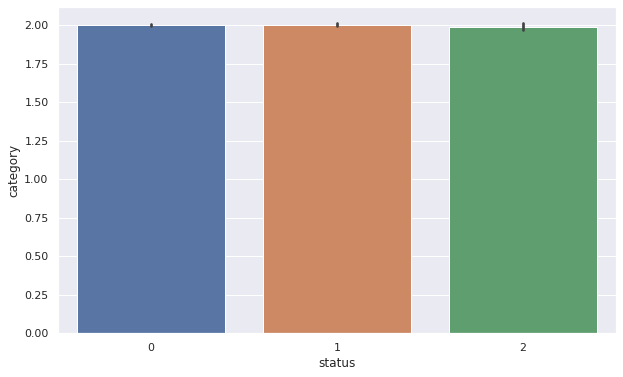

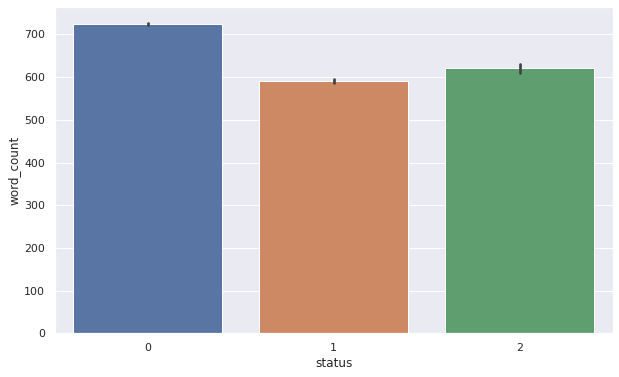

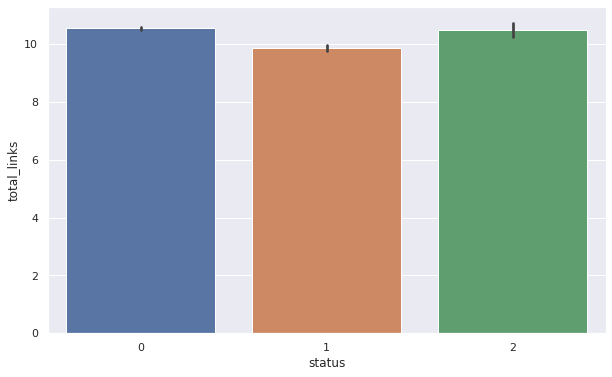

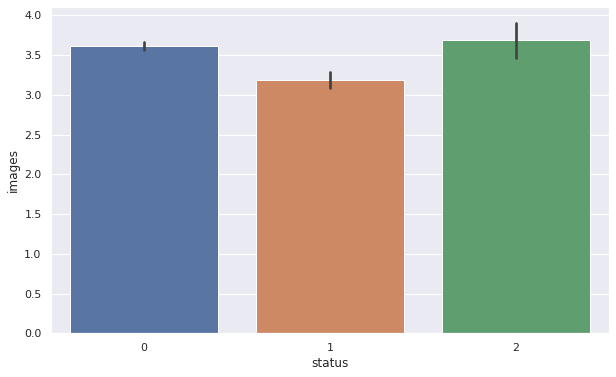

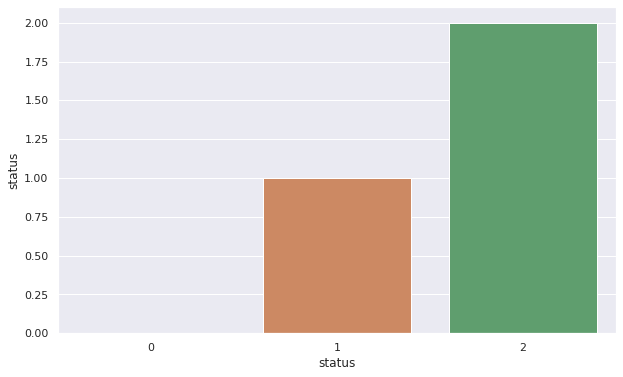

In [285]:
#Barplot of Status vs other features 
for col in b[1:]:
  plt.figure(figsize=(10, 6))
  sns.barplot(y=col, x='status', data=df)

####The barplot shows the relationship of dependent variable and independent variable.

In [286]:
#Deep dive data visulazation for some features.
c=list(df[['email_type','location','source_type','campaign_type','category']])

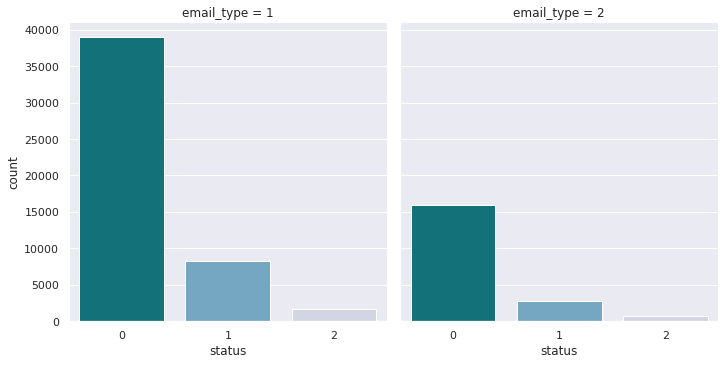

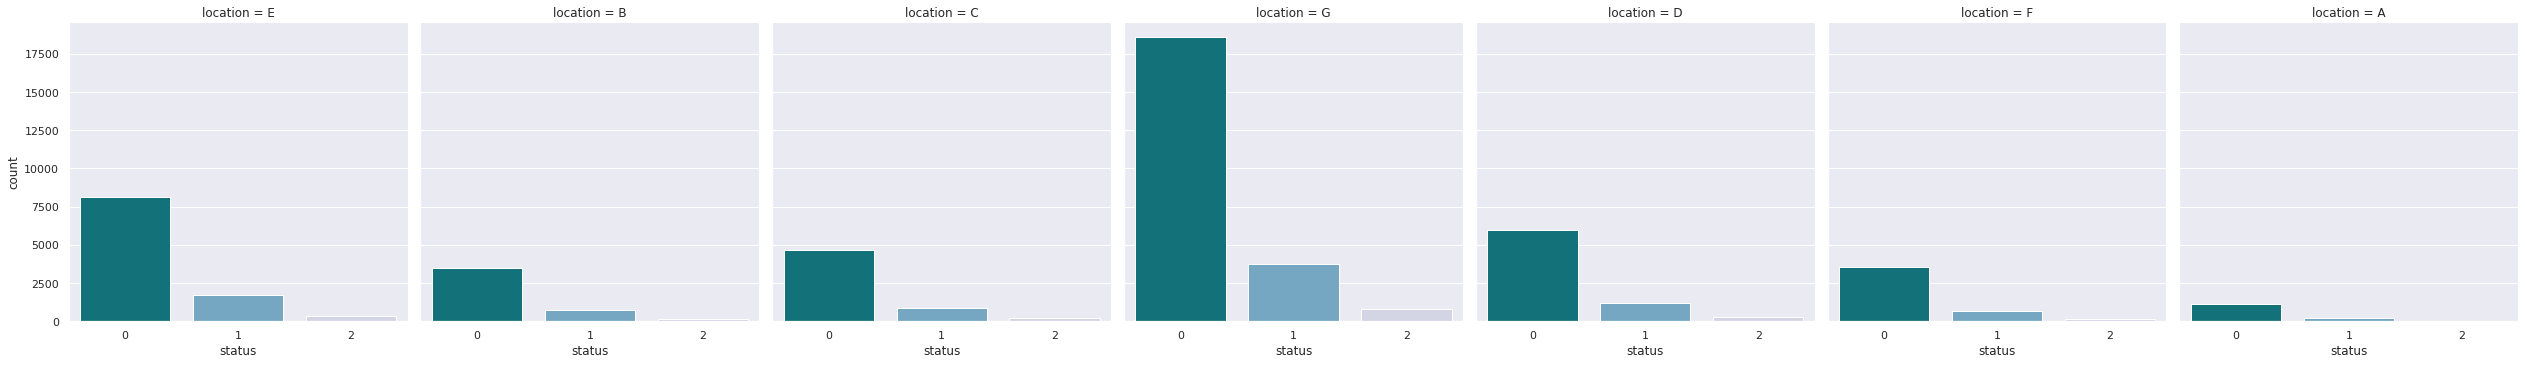

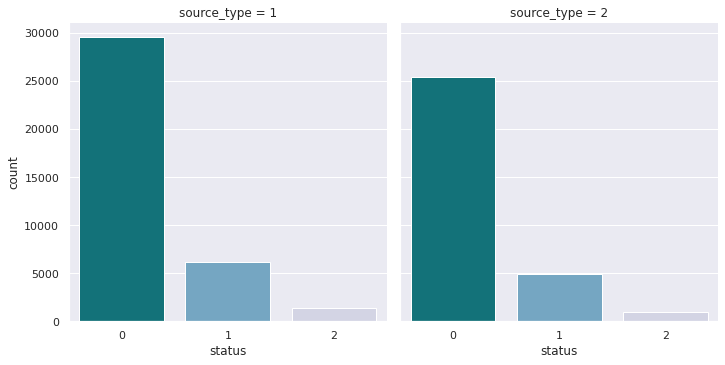

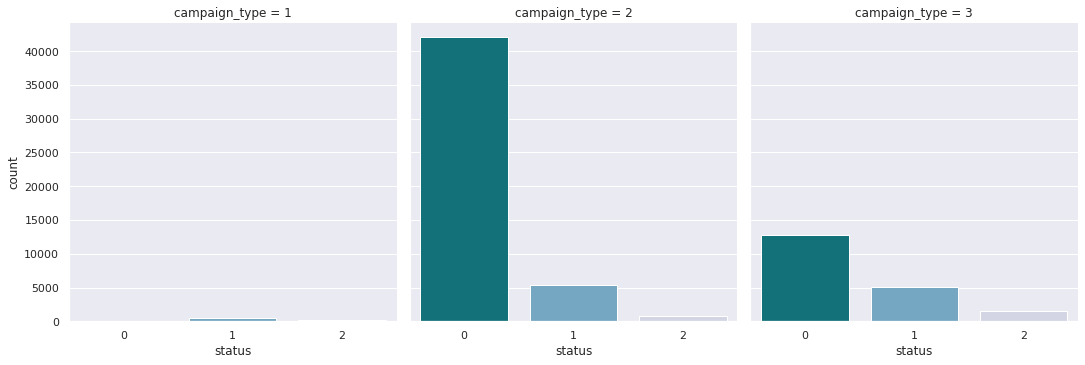

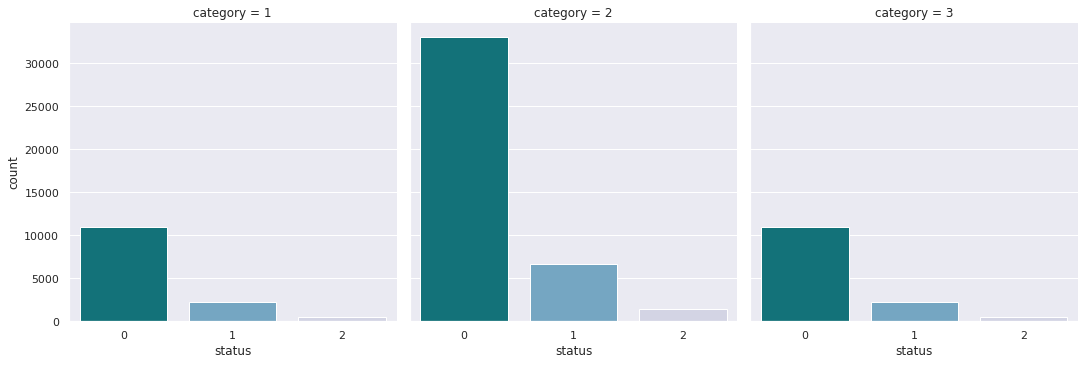

In [287]:
#Countplot 
for col in c[:]:
   sns.factorplot(x='status', col=col, kind='count', data=df,palette='PuBuGn_r');

####As we can in most of the barplots the status 0 is high in muber followed by status 1 and status 2.

###Dependent Variable visualization

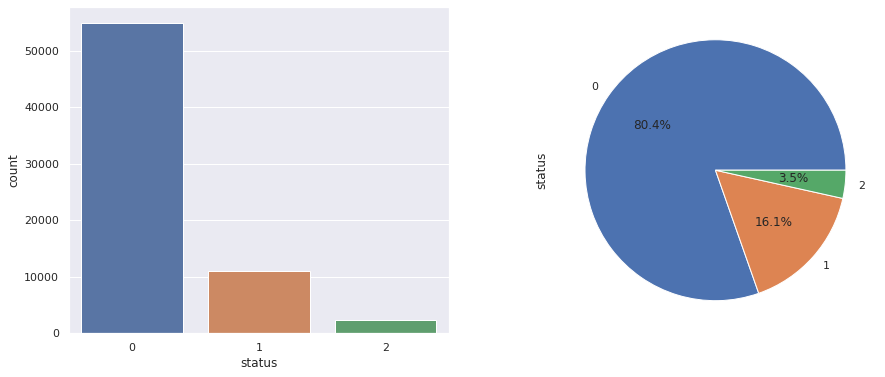

In [288]:
#plotting details of status features
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='status', data=df, ax=ax[0])
_ = df['status'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

####We have multiclass dependent variable and from pie chart we can see status has 80.4% data so we can conclude our data is imbalanced.

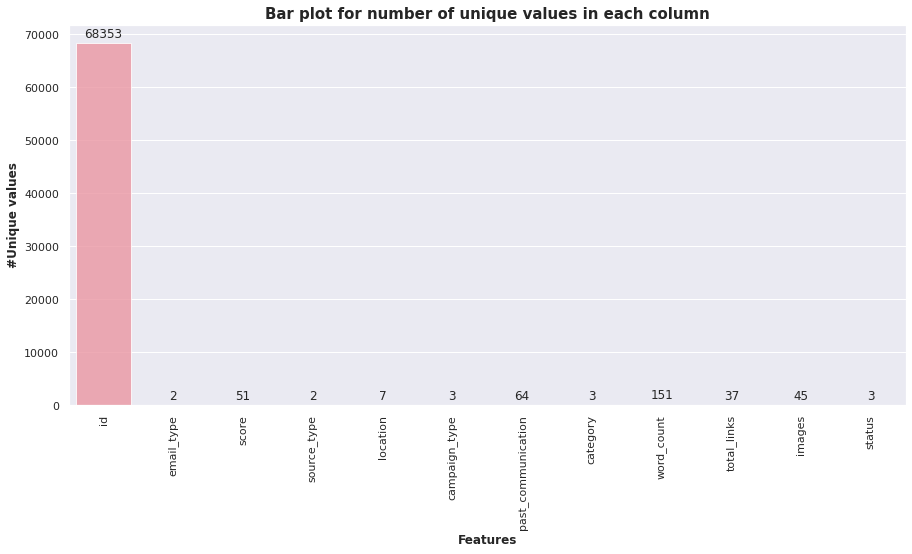

In [289]:
#Plotting unique values in each feature
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

##**Handelling Missing Data** 

In [290]:
#missing values in our dataset
missing = pd.DataFrame([df.isnull().sum(),df.isnull().sum()*100.0/df.shape[0]]).T
missing.columns = ['No. of Missing Data', '% Missing Data']
missing

,No. of Missing Data,% Missing Data
id,0.0,0.000000
email_type,0.0,0.000000
score,0.0,0.000000
source_type,0.0,0.000000
location,11595.0,16.963411
campaign_type,0.0,0.000000
past_communication,6825.0,9.984931
category,0.0,0.000000
word_count,0.0,0.000000
total_links,2201.0,3.220049


####The feature location, total_links , images, past_communication features have missing values.

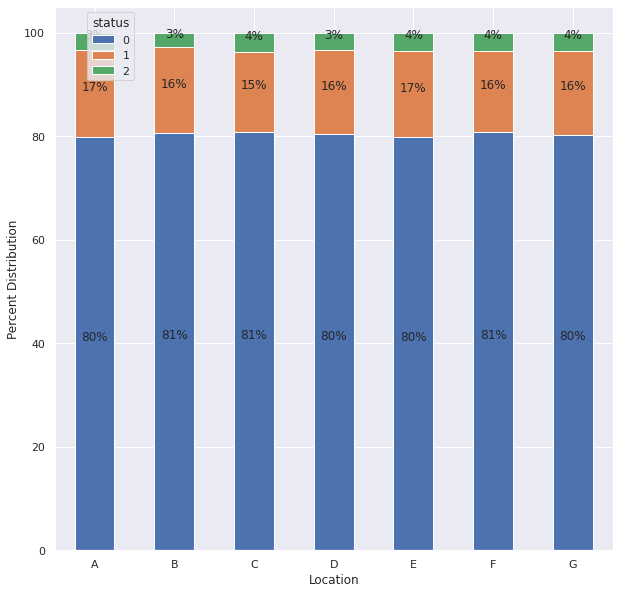

In [291]:
# crosstab
#pal = ["royalblue", "dodgerblue", "lightblue", "lightblue"]
ax= pd.crosstab(df['location'], df['status']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)
#display(ax)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="status")
plt.xlabel('Location')
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.show()

####As we can see irrespective of location the ratio of Status is same throughout .So we can drop the location column

####We saw in univariate analysis the past communuication feature is distrubuted symmetrical so we will substitute the null values with mean value. 

In [292]:
#replacing the missing values in past communication feature 
print('Number of missing values before imputing is = ',df['past_communication'].isnull().sum())
df['past_communication'].fillna(df['past_communication'].mean(),inplace=True)
print('Number of missing values after imputing is = ',df['past_communication'].isnull().sum())

Number of missing values before imputing is =  6825
Number of missing values after imputing is =  0


####We saw in univariate analysis the total images and links has right skewed distrubution so we will substitute the null values with mode value.

In [293]:
#Filling missing values of Total_Links column
print('Number of missing values before imputing is = ',df['total_links'].isnull().sum())
df['total_links'].fillna(df['total_links'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',df['total_links'].isnull().sum())
#Filling missing values of images column
print('Number of missing values before imputing is = ',df['images'].isnull().sum())
df['images'].fillna(df['images'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',df['images'].isnull().sum())

Number of missing values before imputing is =  2201
Number of missing values after imputing is =  0
Number of missing values before imputing is =  1677
Number of missing values after imputing is =  0


##**Handelling Outliers**

In [294]:
#Extracting the discrete variables from feature
discrete = []
for var in numerical_features:
    if len(df[var].unique())<20:
        print(var, ' values: ', df[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

email_type  values:  [1 2]
source_type  values:  [2 1]
campaign_type  values:  [2 3 1]
category  values:  [1 2 3]
status  values:  [0 1 2]
There are 5 discrete variables


In [295]:
#Extracting the continous variables from features
continuous = [var for var in numerical_features if var not in discrete and var not in ['Id']]

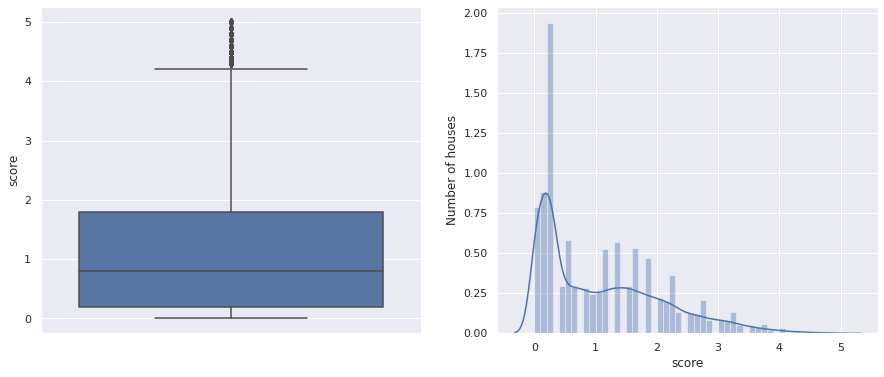

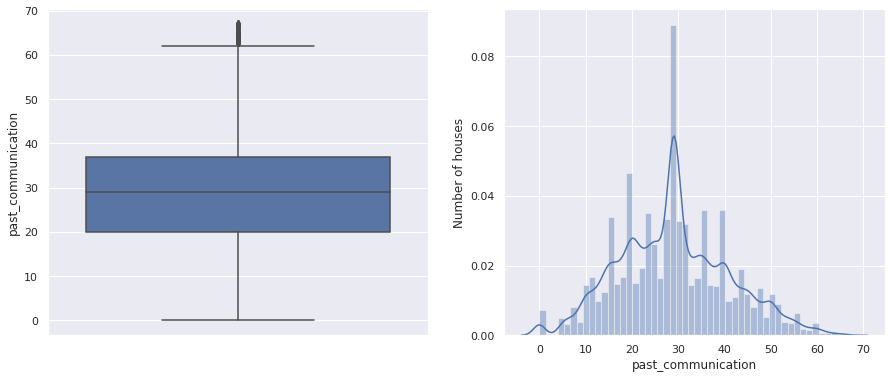

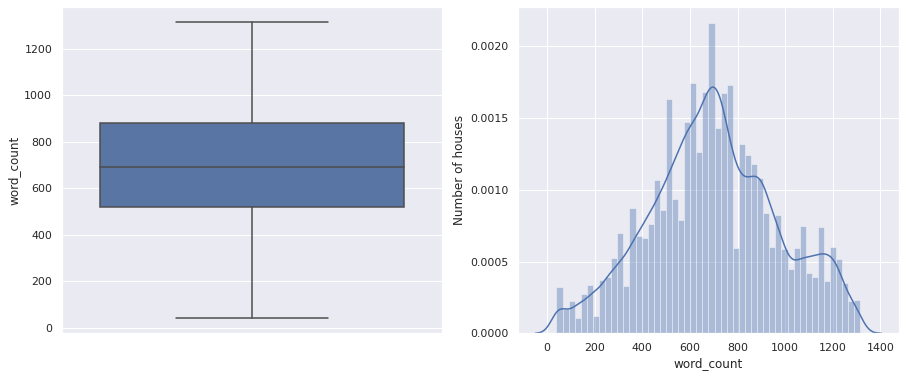

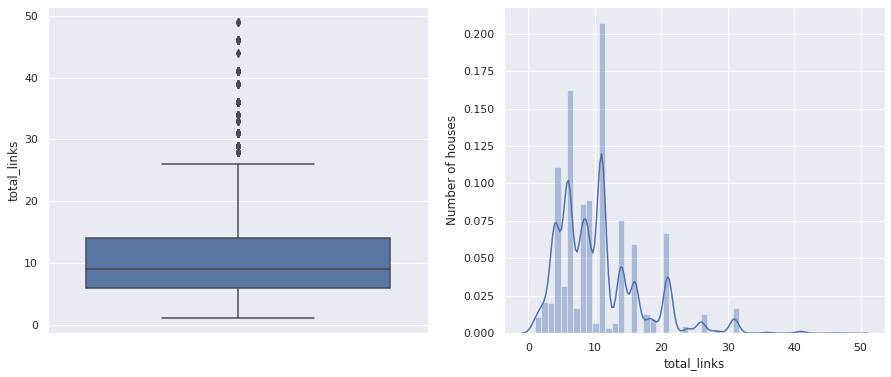

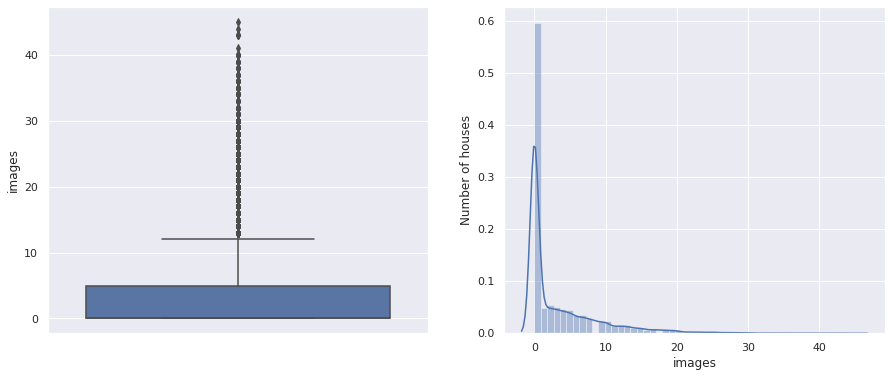

In [296]:
#plotting the outliers boxplot and spread of variance in features
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna())
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

###From above boxplot we can see features with null values are as follows :-
1.   Score
2.   Past communication
3.   total links 
4.   total images 



###Deep dive into these feature's outliers.

In [297]:
#Creating the temporary dataframe
temp_df = df[['status','score','images','total_links','past_communication']]

In [298]:
temp_df['status'] = temp_df.loc[temp_df.index, 'status'].copy()

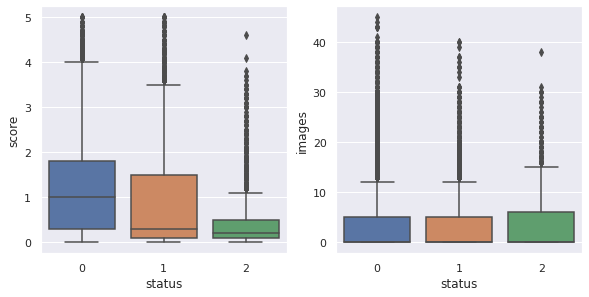

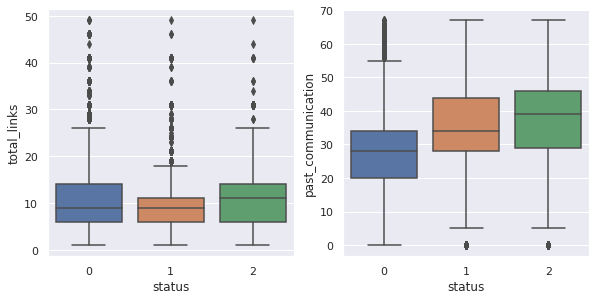

In [299]:
#plotiing outliers of features present w.r.t the status feature
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(temp_df.columns):
    if ix <= 3:
        if c != 'status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data=temp_df, x='status', y=c, ax=ax1)        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

####As we know our dataset imbalanced so removing outliers will affect on minority class so we will keep the outliers and we will use machine learning models which are robust to outliers.

##**Categorical encoding**

In [300]:
df.head()

,id,email_type,score,source_type,location,campaign_type,past_communication,category,word_count,total_links,images,status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [301]:
#creating dummies for categorical variables
cat_col=['email_type','source_type','source_type','location','campaign_type']
new_df=pd.get_dummies(df, columns=cat_col)
new_df.drop('email_type_2',axis=1,inplace=True) #Since they have binary category
new_df.drop('source_type_2',axis=1,inplace=True)

In [302]:
#print top 5 rows with dummies 
new_df.head()

,id,score,past_communication,category,word_count,total_links,images,status,email_type_1,source_type_1,source_type_1,location_A,location_B,location_C,location_D,location_E,location_F,location_G,campaign_type_1,campaign_type_2,campaign_type_3
0,EMA00081000034500,2.2,33.0,1,440,8.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,EMA00081000045360,2.1,15.0,2,504,5.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
2,EMA00081000066290,0.1,36.0,2,962,5.0,0.0,1,0,1,1,0,1,0,0,0,0,0,0,0,1
3,EMA00081000076560,3.0,25.0,2,610,16.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
4,EMA00081000109720,0.0,18.0,2,947,4.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [303]:
#Pushing Email_Status at last of the DataFrame
list_of_col=list(new_df.columns)
list_of_col.remove('status')
list_of_col.append('status')
list_of_col
new_df=new_df[list_of_col]
new_df.head(2)

,id,score,past_communication,category,word_count,total_links,images,email_type_1,source_type_1,source_type_1,source_type_1,source_type_1,location_A,location_B,location_C,location_D,location_E,location_F,location_G,campaign_type_1,campaign_type_2,campaign_type_3,status
0,EMA00081000034500,2.2,33.0,1,440,8.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,EMA00081000045360,2.1,15.0,2,504,5.0,0.0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0


##**Data Transformation**

In [304]:
#Seprating the numerical columns
numerical_columns = new_df[['score','past_communication','word_count','images']]

In [305]:
#Applying standardization formula
for column in numerical_columns:
  new_df[column] = ((new_df[column] - new_df[column].mean()) / (new_df[column].std()))

In [306]:
#Print last 5 rows 
new_df.tail()

,id,score,past_communication,category,word_count,total_links,images,email_type_1,source_type_1,source_type_1,source_type_1,source_type_1,location_A,location_B,location_C,location_D,location_E,location_F,location_G,campaign_type_1,campaign_type_2,campaign_type_3,status
68348,EMA00089995974500,-0.697169,-0.582912,3,0.136421,16.0,1.716693,0,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0
68349,EMA00089998225300,0.205016,0.930435,2,-0.172721,31.0,2.256735,1,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0
68350,EMA00089998436500,1.107201,0.341911,2,-0.772605,9.0,-0.623490,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
68351,EMA00089999168800,-0.697169,1.771183,1,0.121700,14.0,0.096566,1,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0
68352,EMA00089999316900,0.405501,-0.751061,2,1.244181,6.0,-0.623490,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0,0


###**Correlation**

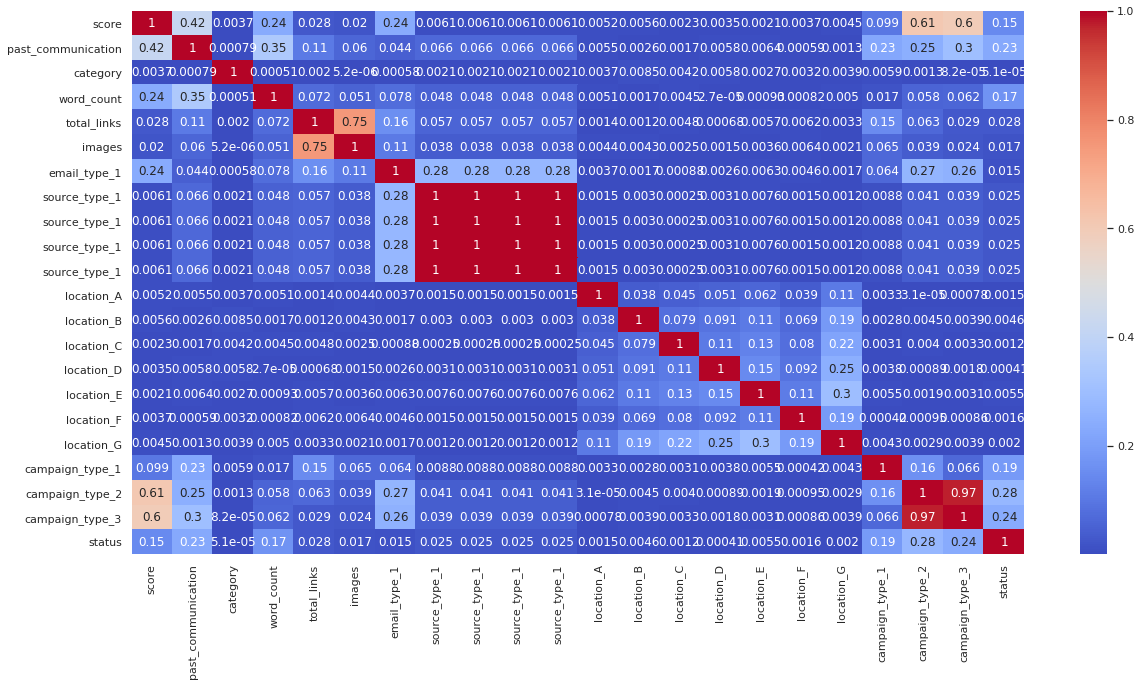

In [307]:
## Correlation
plt.figure(figsize=(20,10))
correlation=new_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [311]:
# Dealing with Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [312]:
calc_vif(new_df[[i for i in new_df.describe().columns if i not in ['id','location','email_type','source_type','campaign_type','category','total_links','images','status','source_type_1']]])

,variables,VIF
0,score,2.411241
1,past_communication,1.939716
2,word_count,1.526551
3,email_type_1,1.121603
4,location_A,1.101572
5,location_B,1.287216
6,location_C,1.370743
7,location_D,1.461264
8,location_E,1.599116
9,location_F,1.292755


##**Features selection**

In [313]:
# Data for all the independent variables
X = new_df.drop(labels=['status','id'],axis=1)

# Data for the dependent variable
y = new_df['status']

In [318]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# define SelectFromModel feature selection method
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=40), max_features=18)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

6 selected features


In [321]:
#Important features list
embeded_rf_feature

['score',
 'past_communication',
 'category',
 'word_count',
 'total_links',
 'images']

In [320]:
#Creating the final datadrame for modelling
final_df=new_df[['score','past_communication','category','word_count','total_links','images','status']]

In [322]:
#FPrint top 5 rows 
final_df.head()

,score,past_communication,category,word_count,total_links,images,status
0,1.107201,0.341911,1,-0.956618,8.0,-0.62349,0
1,1.006958,-1.171435,2,-0.721081,5.0,-0.62349,0
2,-0.997898,0.594136,2,0.964481,5.0,-0.62349,1
3,1.909143,-0.330687,2,-0.330973,16.0,-0.62349,0
4,-1.098141,-0.919211,2,0.909277,4.0,-0.62349,0


##**Handelling the imbalanced data**

In [323]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(final_df.iloc[:,1:-1], final_df['status'])

print('Original dataset shape', len(final_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 68353
Resampled dataset shape 164823


Text(0.5, 1.0, 'Before SMOTE')

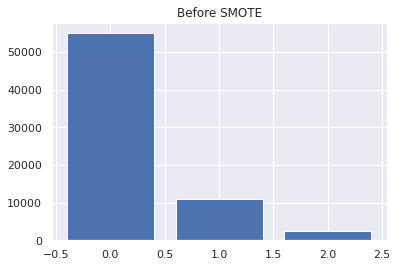

In [324]:
plt.bar(Counter(final_df['status']).keys(), Counter(final_df['status']).values())
plt.title("Before SMOTE")

Text(0.5, 1.0, 'After SMOTE')

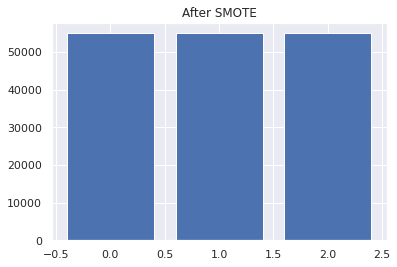

In [325]:
plt.bar(Counter(y_smote).keys(), Counter(y_smote).values())
plt.title("After SMOTE")

In [326]:
#Unique elemnets of status features 
unique_elements, counts_elements = np.unique(y_smote, return_counts=True)
print("Frequency of unique values of the Email_Status:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the Email_Status:
[[    0     1     2]
 [54941 54941 54941]]


In [327]:
from sklearn.model_selection import train_test_split
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3,stratify= y_smote)

##**Modelling**

In [349]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [332]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

In [334]:
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns) # Creating dataframe to store the train and test metrics for each of the models
    
    i=0
    
    #Reading model one by one
    for model in models:
        model.fit(X_train,y_train)
        
        train_class_preds = model.predict(X_train)
        test_class_preds = model.predict(X_test)

        # Get the probabilities on train and test
        train_preds = model.predict_proba(X_train)
        test_preds = model.predict_proba(X_test)

        # Calculating accuracy on train and test
        train_accuracy = accuracy_score(y_train,train_class_preds)
        test_accuracy = accuracy_score(y_test,test_class_preds)

        # Get the confusion matrices for train and test
        train_cm = confusion_matrix(y_train,train_class_preds)
        test_cm = confusion_matrix(y_test,test_class_preds )


        # Get the Recall for train and test
        train_recall = recall_score(y_train, train_class_preds, average='weighted')
        test_recall = recall_score(y_test, test_class_preds, average='weighted')

        # Get the precision for train and test
        train_precision = precision_score(y_train, train_class_preds, average='weighted')
        test_precision = precision_score(y_test, test_class_preds, average='weighted')

        # Get the f1 Score for train and test
        train_f1score = f1_score(y_train, train_class_preds, average='weighted')
        test_f1score = f1_score(y_test, test_class_preds, average='weighted')

        # Get the roc_auc score for train and test dataset
        train_auc = roc_auc_score(y_train,train_preds,multi_class = 'ovr')
        test_auc = roc_auc_score(y_test,test_preds,multi_class = 'ovr')
              
        
        #Inserting in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Recall_Train"]=round(train_recall,2)
        df.loc[i,"Recall_Test"]=round(test_recall,2)
        df.loc[i,"Precision_Train"]=round(train_precision,2)
        df.loc[i,"Precision_Test"]=round(test_precision,2)
        df.loc[i,"Train_F1score"]=round(train_f1score,2)
        df.loc[i,"Test_F1score"]=round(test_f1score,2)
        df.loc[i,"Train_AUC"]=round(train_auc,2)
        df.loc[i,"Test_Auc"]=round(test_auc,2)
        df.loc[i,"Train_accuracy"]=round(train_accuracy,2)
        df.loc[i,"Test_accuracy"]=round(test_accuracy,2)
        
        i+=1
    
    return df

In [335]:
def model_roc_auc(model_name):
    train_preds = model_name.predict_proba(X_train)
    test_preds = model_name.predict_proba(X_test)

    # Get the roc_auc score for train and test dataset
    train_auc = roc_auc_score(y_train,train_preds,multi_class = 'ovr')
    test_auc = roc_auc_score(y_test,test_preds,multi_class = 'ovr')

    fpr = {}
    tpr = {}
    thresh ={}
    n_class=3
    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds[:,i], pos_label=i)
    plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend()

###**Decision Tree Classifier**

In [337]:
# Fit the decision tree model
dt_classifier_smote = DecisionTreeClassifier()
dt_classifier_smote.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [338]:
models = [dt_classifier_smote]
report1=score_model(X_train,y_train,X_test,y_test)
Combine_Model.append(report1)
report1

,Model_Name,Recall_Train,Recall_Test,Precision_Train,Precision_Test,Train_F1score,Test_F1score,Train_AUC,Test_Auc,Train_accuracy,Test_accuracy
0,DecisionTreeClassifier,0.99,0.75,0.99,0.75,0.99,0.75,1.0,0.82,0.99,0.75


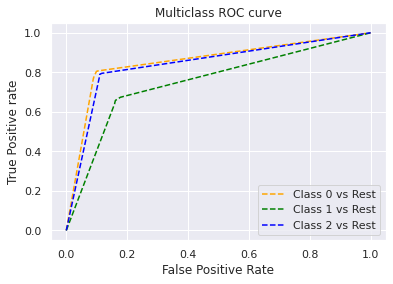

In [350]:
#TPR VS FPR
model_roc_auc(dt_classifier_smote)

###**XGBoost model**

In [352]:
xgb_model = XGBClassifier(n_estimators=100,max_depth=25,min_samples_leaf=20,min_samples_split=30)

In [353]:
# Fit the model
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, min_samples_leaf=20, min_samples_split=30,
              missing=None, n_estimators=100, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [354]:
models = [xgb_model]
report2=score_model(X_train,y_train,X_test,y_test)
report2

,Model_Name,Recall_Train,Recall_Test,Precision_Train,Precision_Test,Train_F1score,Test_F1score,Train_AUC,Test_Auc,Train_accuracy,Test_accuracy
0,XGBClassifier,0.98,0.84,0.98,0.84,0.98,0.84,1.0,0.95,0.98,0.84


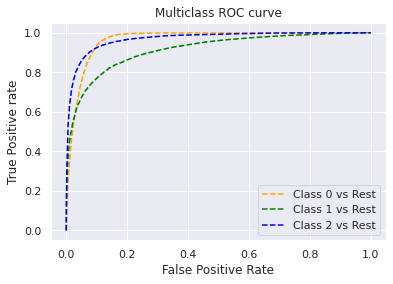

In [355]:
#TPR VS FPR
model_roc_auc(xgb_model)

###**KNN Classifier**

In [358]:
classifier_knn = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)

# Fit the model on the train set
classifier_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [359]:
models = [classifier_knn]
report3=score_model(X_train,y_train,X_test,y_test)
report3

,Model_Name,Recall_Train,Recall_Test,Precision_Train,Precision_Test,Train_F1score,Test_F1score,Train_AUC,Test_Auc,Train_accuracy,Test_accuracy
0,KNeighborsClassifier,0.85,0.75,0.85,0.75,0.85,0.75,0.97,0.89,0.85,0.75


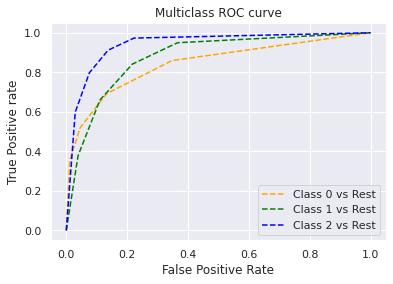

In [360]:
model_roc_auc(classifier_knn)

###**Randomsearch knn**

In [361]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,5)}

In [362]:
# Performing RandomSearch
knn = KNeighborsClassifier()
knn_cv= RandomizedSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': array([1, 2, 3, 4])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [363]:
models = [knn_cv]
report4=score_model(X_train,y_train,X_test,y_test)
report4

,Model_Name,Recall_Train,Recall_Test,Precision_Train,Precision_Test,Train_F1score,Test_F1score,Train_AUC,Test_Auc,Train_accuracy,Test_accuracy
0,RandomizedSearchCV,0.98,0.78,0.98,0.78,0.98,0.78,0.99,0.84,0.98,0.78


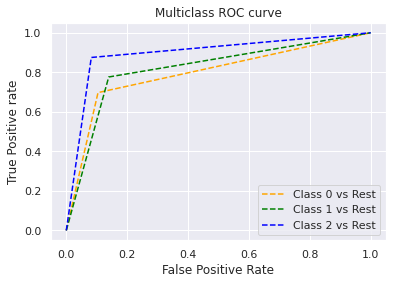

In [364]:
model_roc_auc(knn_cv)

###**RandomForest Classifier**

In [366]:
from sklearn.ensemble import RandomForestClassifier

In [371]:
# Fitting Random Forest Classification to the Training set
classifier_rf = RandomForestClassifier(n_estimators = 12, criterion = 'entropy', random_state = 42)
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [372]:
models = [classifier_rf]
report5=score_model(X_train,y_train,X_test,y_test)
report5

,Model_Name,Recall_Train,Recall_Test,Precision_Train,Precision_Test,Train_F1score,Test_F1score,Train_AUC,Test_Auc,Train_accuracy,Test_accuracy
0,RandomForestClassifier,0.98,0.81,0.98,0.81,0.98,0.81,1.0,0.93,0.98,0.81


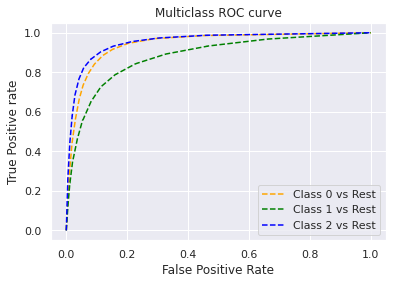

In [373]:
model_roc_auc(classifier_rf)

###**Randomsearchcv classifier**

In [386]:
# Number of trees
n_estimators = [25,75]
# Maximum depth of trees
max_depth = [4,8]
# Minimum number of samples required to split a node
min_samples_split = [25,75]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' :n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' :min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [387]:
# Create an instance of the RandomForestClassifier
rf_model_rs = RandomForestClassifier()

In [388]:
#Random search
rf_random_rs = RandomizedSearchCV(rf_model,param_dict,verbose=2,cv=5)

In [389]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   3.2s
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   3.4s
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   3.1s
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   3.3s
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   3.3s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=8 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=8, total=   9.7s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=8 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=8, total=  10.1s
[CV] n_estimators=100, min_samples_split=100

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [390]:
#Building optimal model on the best estimators
rf_optimal_model = rf_random.best_estimator_

In [391]:
models = [rf_model_rs]
report6=score_model(X_train,y_train,X_test,y_test)
report6

,Model_Name,Recall_Train,Recall_Test,Precision_Train,Precision_Test,Train_F1score,Test_F1score,Train_AUC,Test_Auc,Train_accuracy,Test_accuracy
0,RandomForestClassifier,0.99,0.83,0.99,0.83,0.99,0.83,1.0,0.94,0.99,0.83


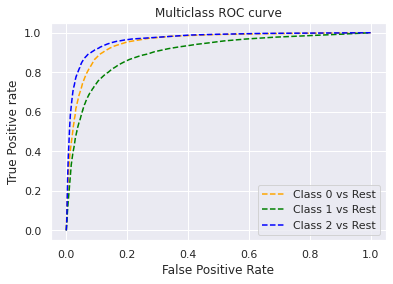

In [392]:
model_roc_auc(rf_model_rs)

###**Evaluation Of all models**

In [393]:
Comparing_all_models = pd.concat([report1,report2,report3,report4,report5,report6],ignore_index=True)

In [394]:
Comparing_all_models

,Model_Name,Recall_Train,Recall_Test,Precision_Train,Precision_Test,Train_F1score,Test_F1score,Train_AUC,Test_Auc,Train_accuracy,Test_accuracy
0,DecisionTreeClassifier,0.99,0.75,0.99,0.75,0.99,0.75,1.00,0.82,0.99,0.75
1,XGBClassifier,0.98,0.84,0.98,0.84,0.98,0.84,1.00,0.95,0.98,0.84
2,KNeighborsClassifier,0.85,0.75,0.85,0.75,0.85,0.75,0.97,0.89,0.85,0.75
3,RandomizedSearchCV,0.98,0.78,0.98,0.78,0.98,0.78,0.99,0.84,0.98,0.78
4,RandomForestClassifier,0.98,0.81,0.98,0.81,0.98,0.81,1.00,0.93,0.98,0.81
5,RandomForestClassifier,0.99,0.83,0.99,0.83,0.99,0.83,1.00,0.94,0.99,0.83


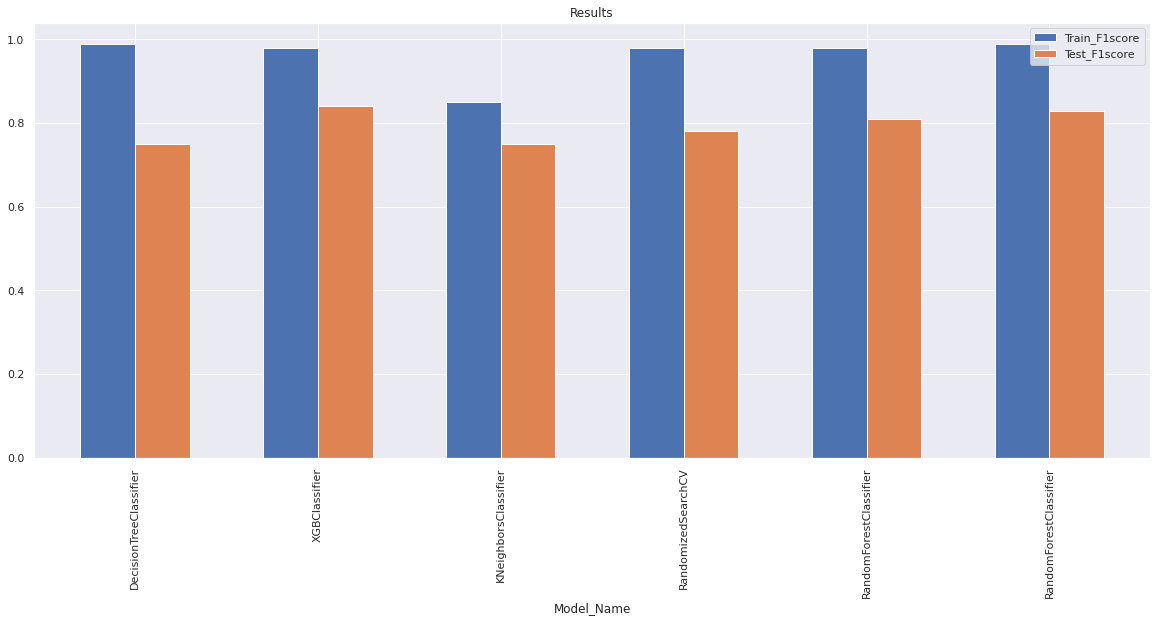

In [395]:
Comparing_all_models.plot.bar(x="Model_Name", y=['Train_F1score','Test_F1score'], title = 'Results' , width = .6, figsize= (20,8))